In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import panel as pn
pn.extension('katex') 

# Effective K & Recitation #

+ **solutions for homework problems 1 – 4**

+ **tutorial problems on effective conductivity and flow nets**

+ **homework problems on effective conductivity and flow nets**







## Solutions for Homework Problems 1 – 2 ##

## Homework Problems 1 ##



Column
    [0] Markdown(str, style={'font-size': '12pt'}, width=800)
    [1] PNG(str, width=350)
    [2] Markdown(str, style={'font-size': '12pt'}, width=800)
    [3] LaTeX(str, style={'font-size': '12pt'}, width=800)
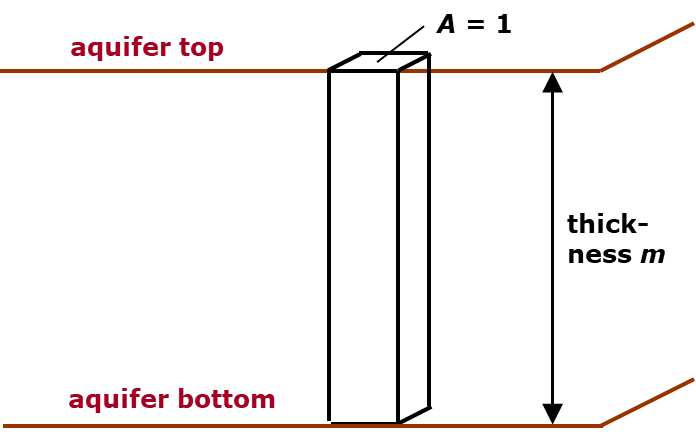

In [10]:
#
r1_1 = pn.pane.Markdown("""
The pressure head in an aquifer extending over 200 km<sup>2</sup> is decreased by 1.60 m.
Determine the loss of groundwater in the aquifer for two scenarios:
A. The aquifer is unconfined (storage coefficient 0.13).
B. The aquifer is confined (storage coefficient 0.0005).

""",width = 800, style={'font-size': '12pt'})  

r1_2= pn.pane.PNG("images/T03_H1.png", width=350)
#r1_2 = pn.pane.PNG("images/T03_H1.PNG") 

### Tutorial Problem 7 – Solution ###

#<img src="images/T03_H1.PNG" alt="Grosser Garten Map"  width="40%" height="100%" >

r1_3 = pn.pane.Markdown(""" 
### Solution - Homework Problem 1 ###
<br> 
Relevant information can be found in Lecture L03, Slides- 28-30

""",width = 800, style={'font-size': '12pt'})  

r1_3b = pn.pane.LaTeX(r""" 
<br> 
The relevant equations is:<br>
$$
S = \Delta V_w/(A\cdot \Delta H)
$$

""",width = 800, style={'font-size': '12pt'}) 
pn.Column(r1_1, r1_2, r1_3, r1_3b)   

In [11]:
# Given 
A = 200 # km^2, aquifer area
D_h = 1.6*0.05 # m, head decrease
S_u = 0.13 # (-), Storativity unconfined aquifer
S_c = 0.0005 # (-) Storage coefficient, confined aquifer

# interim calculation
A_m2 = A*10**6 # m^2, aquifer area unit converted

# Solution
DV_wu = A_m2*S_u*D_h # m^3, change in water volume unconfined aquifer
DV_wc = A_m2*S_c*D_h  # m^3 change in water volume unconfined aquifer

# output

print("Change in water volume in unconfined aquifer is: {0:1.1e}".format(DV_wu),"m\u00b3 \n")
print("Change in water volume in confined aquifer is: {0:1.1e}".format(DV_wc),"m\u00b3")

Change in water volume in unconfined aquifer is: 2.1e+06 m³ 

Change in water volume in confined aquifer is: 8.0e+03 m³


## Homework Problem 2 ##

Conduct a sieve analysis for a dried soil sample (see data in the table below)

1. Draw the granulometric curve (cumulative mass distribution) and briefly characterise the sediment with regard to its major constituent(s).
2. What is the coefficient of uniformity? 


In [12]:
### Head = ["mesh size [mm]", "residue in the sieve [g] ", "∑ total", "∑ / ∑total"]
Size = [6.3, 2, 0.63, 0.2, 0.063, "< 0.063 /cup"]
residue = [11, 62, 288, 189, 42, 8]


data1= {"mesh size [mm]": Size, "residue in the sieve [g] ": residue}
df1= pd.DataFrame(data1)
df1.set_index("mesh size [mm]")


,residue in the sieve [g]
mesh size [mm],
6.3,11
2,62
0.63,288
0.2,189
0.063,42
< 0.063 /cup,8


### Solution of problem 2 ###

In [13]:
# solution of problem 2

t_sample = np.sum(residue) # g, add the residue column to get total mass
retain_per = np.round(residue/t_sample *100,2) # %, # retain percentage residue/total mass
retain_per_cumsum =np.round(np.cumsum(retain_per),2) # get the cummulative sum of the reatined
passing_per = np.round(100 - retain_per_cumsum,3) # substract 100-cummsum to get passing % - the last column

data2 = {"mesh size [mm]": Size, "residue in the sieve [g]": residue, "Σtotal %": retain_per, "Σ/Σtotal %": passing_per }

df2= pd.DataFrame(data2)
df2 = df2.set_index("mesh size [mm]")
df2


,residue in the sieve [g],Σtotal %,Σ/Σtotal %
mesh size [mm],,,
6.3,11,1.83,98.17
2,62,10.33,87.84
0.63,288,48.00,39.84
0.2,189,31.50,8.34
0.063,42,7.00,1.34
< 0.063 /cup,8,1.33,0.01


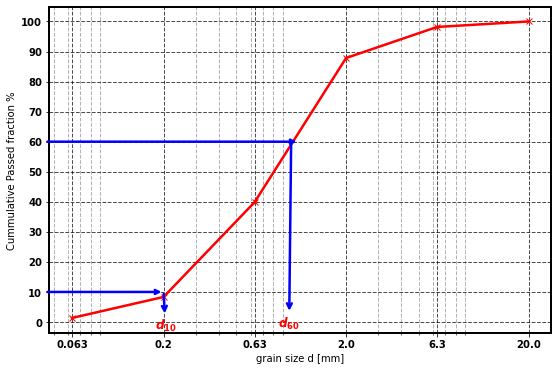

In [14]:
# Plotting granulometric curve

plt.rcParams['axes.linewidth']=2
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth']=1

x = np.append([20], Size[:5]) # adding for all left over.
y = np.append([100],passing_per[:5])

fig = plt.figure(figsize=(9,6));

plt.plot(x, y, 'x-', color='red', lw=2.5); 
tics=x.tolist()

plt.xscale('log');lw=2.5

plt.grid(which='major', color='k', alpha=0.7) 
plt.grid(which='minor', color='k', alpha=0.3)
plt.xticks(x, tics);  
plt.yticks(np.arange(0,110,10));

#plt.title('grain size distribution (combined wet sieving and sedimentation analysis)');
plt.xlabel('grain size d [mm]');
plt.ylabel('Cummulative Passed fraction %');

plt.annotate('', xy=(0.20, 10),  xycoords='data', xytext=(0.045, 10), arrowprops=dict(arrowstyle='->', color="b", lw=2.5),ha='right', va='top',)
plt.annotate('', xy=(1.1, 60),  xycoords='data', xytext=(0.045, 60), arrowprops=dict(arrowstyle='->', color="b", lw=2.5),ha='right', va='top',)
plt.annotate(r'$d_{60}$', xy=(1, 60),  xycoords="data", xytext=(0.85, -3),color='red',size=12, arrowprops=dict(arrowstyle='<-', color="b", lw=2.5),ha='left', va='bottom',)
plt.annotate(r'$d_{10}$', xy=(0.20, 10),  xycoords='data', xytext=(0.235, 1.5),color='red',size=12, arrowprops=dict(arrowstyle='<-', color="b", lw=2.5),ha='right', va='top',)
plt.rcParams["font.weight"] = "bold"   

plt.savefig("fig6.png", dpi=300)

mpl_pane = pn.pane.Matplotlib(fig)


In [8]:
# From the figure
d_10 = 0.22 # mm,approx, diameter 10% passing, see the arrow bottom in x-axis
d_60 = 1.0 # mm, approx diameter 10% passing, see the arrow bottom in x-axis

c_u = d_60/d_10 # [], coefficient of uniformity

#Output
print("\n The coefficient of uniformity is: {0:1.1f}".format(c_u), "\n") 
r2_1 = pn.pane.Markdown("""
**Major constituents: coarse sand/medium sand** """, width=600, style={'font-size': '12pt', 'color': 'blue'} )
pn.Row(r2_1) 


 The coefficient of uniformity is: 4.5 



Row
    [0] Markdown(str, style={'font-size': '12pt', ...}, width=600)

## Tutorial Problems on effective conductivity ## 


### Tutorial problem 11 ###

A sandy layer with a thickness of 2.5 m is embedded between two gravel layers. Both gravel layers have a thickness of 1.5 m and a hydraulic conductivity of 3.7·10<sup>-3</sup> m/s. 
Steady-state groundwater flow is in parallel to the layering. 
A hydraulic gradient of 0.001 and an overall discharge of 1 m³/d per unit width have been determined.
<br><br>
a. Determine the effective hydraulic conductivity.<br><br>
b. What is the hydraulic conductivity of the sand layer?<br><br>
c. Which effective hydraulic conductivity would be obtained if flow was assumed perpendicular to the layering?<br><br>
d. Calculate effective hydraulic conductivity if the angle between the flow direction and the layering equals 45°.


Row
    [0] PNG(str, width=400)
    [1] Spacer(width=100)
    [2] LaTeX(str, style={'font-size': '12pt'}, width=500)
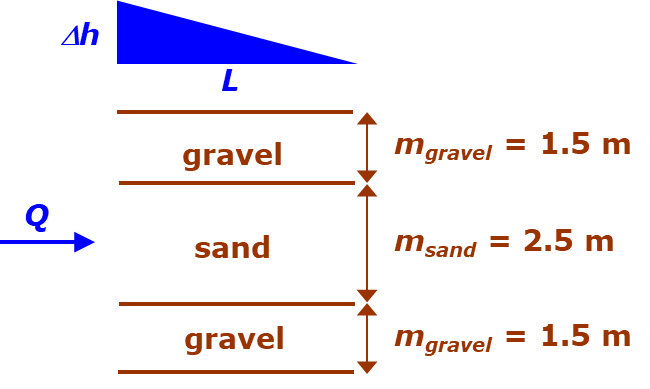

In [15]:
# Solution of Problem 11
r5_3 = pn.pane.PNG("images/T04_TP11_a.png", width=400)
r5_4 = pn.pane.LaTeX(r"""
Known relationships are (see Lecture 05, Slides 8-13, 22):
$$
Q = WmK\frac{\Delta H}{L}
$$
$$
K = \frac{Q/W}{m\cdot \Delta H \cdot L}
$$
Weighted arithmetic mean to determine hydraulic conductivity for sand:

$$
K = \frac{1}{m}\sum_{i=1}^n m_i\cdot K_i
$$

where $i$ is different layers
""", width = 500, style={'font-size': '12pt'})
spacer2 = pn.Spacer(width=100)

pn.Row(r5_3, spacer2, r5_4)  

In [16]:
#Given Solution of 11 a, b

Q = 1 # m^3/d, discharge
W = 1 # m, per unit width
K_g = 3.7*1E-3# m/s, conductivity of gravel layer 
m_g = 1.5 # m, thickness of gravel layer
m_s = 2.5 # m, thickness of sand layer
Dh_L = 0.001 # (-), hydraulic gradient

#interim calculation
m = 2*m_g + m_s # m. total thickness of aquifer

#Solution of 11a
Keff_h = (Q/W)/(m*Dh_L) # m/d, conductivity
Keff_hs = Keff_h/(24*3600)# m/s, conductivity unit changed

#Solution of 11b
# K_eff = (2*m_g*K_g + m_s*K_s)/m # (Keff*m-2*m_g*K_g)/m_s

K_s = ((m*Keff_hs - 2*m_g*K_g))/m_s  # m/s cond. of sand layer

print("\n")
print("Effective horizontal hydraulic conductivity (Keff_h) = {0:1.2f}".format(Keff_h), "m/d\n" ) 
print("Effective horizontal hydraulic conductivity (Keff_hs) = {0:1.3E}".format(Keff_hs), "m/s\n" )
print("Hydraulic conductivity of sand layer (K_s) = {0:1.1E}".format(K_s), "m/s\n" )     



Effective horizontal hydraulic conductivity (Keff_h) = 181.82 m/d

Effective horizontal hydraulic conductivity (Keff_hs) = 2.104E-03 m/s

Hydraulic conductivity of sand layer (K_s) = 1.9E-04 m/s



Row
    [0] Column
        [0] PNG(str, width=200)
        [1] PNG(str, width=200)
    [1] Spacer(width=100)
    [2] LaTeX(str, style={'font-size': '13pt'})
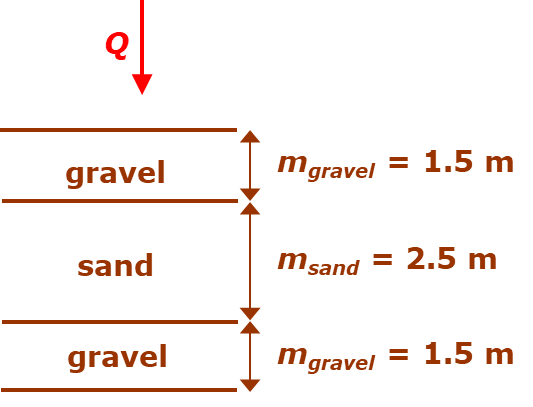
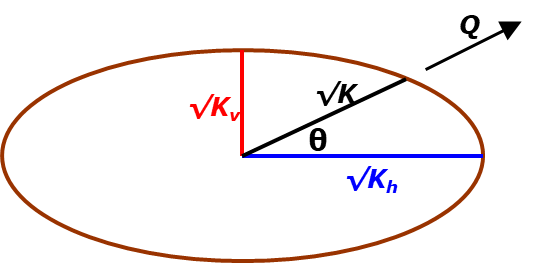

In [17]:
#Given Solution of 11 c, d

r5_5 = pn.pane.PNG("images/T04_TP11_b.png", width=200) 
r5_6 = pn.pane.PNG("images/T04_TP11_c.png", width=200) 

r5_7 = pn.Column(r5_5, r5_6) 

r5_8 = pn.pane.LaTeX(r"""
Vertical effective conductivity is given by weighted harmoninc mean

$$
K = \frac{m}{2\cdot \frac{m_g}{K_g} + \frac{m_s}{K_s} }
$$

<br>
For inclined aquider the effective conductivity is:

$$
K = \frac{1}{\frac{\cos^2\theta}{K_h} + \frac{\sin^2\theta}{K_v}}
$$

""", style={'font-size': '13pt'})

pn.Row(r5_7,spacer2, r5_8) 

In [18]:
# Solution of 11c

Keff_v = m/(2*(m_g/K_g)+ (m_s/K_s)) # m/s, conductivity K_v

#Given 
theta = 45 # theta 
theta_r = theta*(np.pi)/180 # degree to radian conversion
K_h = Keff_hs # m/s, solution from 11a
K_v = Keff_v # m/s, solution from 11c

# solution from 11d
Keff_i = 1/((np.cos(theta_r)**2/K_h)+(np.sin(theta_r)**2/K_v))

print("\n")
print("Effective horizontal hydraulic conductivity (Keff_hs) = {0:1.2E}".format(Keff_hs), "m/s\n" ) 
print("Effective vertical hydraulic conductivity (Keff_v) = {0:1.2E}".format(Keff_v), "m/s\n" ) 
print("Effective inclined hydraulic conductivity (Keff_i) = {0:1.2E}".format(Keff_i), "m/s\n" ) 




Effective horizontal hydraulic conductivity (Keff_hs) = 2.10E-03 m/s

Effective vertical hydraulic conductivity (Keff_v) = 3.93E-04 m/s

Effective inclined hydraulic conductivity (Keff_i) = 6.62E-04 m/s



In [19]:
r8_1= pn.pane.Markdown("""
##Homework Problems on  Effective Conductivity <br><br><br> 
""", width = 800, style={'font-size': '12pt'})


r8_2= pn.pane.Markdown("""
### There is no obligation to solve homework problems!
""", width = 800, style={'font-size': '12pt', 'color':'red'})

pn.Column(r8_1,r8_2)  

Column
    [0] Markdown(str, style={'font-size': '12pt'}, width=800)
    [1] Markdown(str, style={'font-size': '12pt', ...}, width=800)

In [20]:
#
r9_1= pn.pane.Markdown("""
### Homework Problem 5: Effective Hydraulic Conductivity ###
A gravel layer with a thickness of 2.5 m is embedded between two sand layers. Both sand layers have a thickness of 
1.5 m and a hydraulic conductivity of 3.7·10<sup>-4</sup> m/s. Steady-state groundwater flow is perpendicular to the layering. 
An overall head difference of 5.5 cm and a discharge of 500 l/d per unit area have been determined <br><br>

**a.** Determine the effective hydraulic conductivity.<br><br>
**b.** What is the hydraulic conductivity of the gravel layer?<br><br>
**c.** Which effective hydraulic conductivity would be obtained if flow was assumed to be in parallel with the layering?<br><br>
**d.** Calculate effective hydraulic conductivity if the angle between the flow direction and the layering equals 30°. <br>

""", width = 900, style={'font-size': '12pt'})
r9_1


Markdown(str, style={'font-size': '12pt'}, width=900)